In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize
!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files
import matplotlib.cm as cm
import matplotlib.colors as colors
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ca-certificates-2019.9.11  |       hecc5488_0         144 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

In [2]:
from bs4 import BeautifulSoup
import lxml
from tabulate import tabulate

In [3]:
res = requests.get("https://en.wikipedia.org/wiki/List_of_cities_by_GDP")
soup = BeautifulSoup(res.content,'lxml')
table = soup.find_all('table')[0] 
df = pd.read_html(str(table))
df=df[0]
df.head()

,City/Metropolitan area,Country/Region,UNSDsub‑region[1],Official est.NominalGDP ($BN),Brookings Institution[2]2014 est.PPP-adjustedGDP ($BN),PwC[3]2008 est.PPP-adjustedGDP ($BN),McKinsey[4]2010 est.NominalGDP ($BN),Other est.NominalGDP ($BN)
0,Aachen-Liège-Maastricht,Germany Belgium Netherlands,Western Europe,NaN,99.7,NaN,NaN,NaN
1,Aberdeen,United Kingdom,Northern Europe,11.3 (2008)[5],NaN,NaN,NaN,NaN
2,Abidjan,Ivory Coast,Africa,NaN,NaN,13,NaN,NaN
3,Abu Dhabi,United Arab Emirates,Western Asia,119[6],178.3,NaN,67.1,NaN
4,Addis Ababa,Ethiopia,Africa,NaN,NaN,12,NaN,NaN


In [4]:
df.drop(['UNSDsub‑region[1]','Brookings Institution[2]2014 est.PPP-adjustedGDP ($BN)',
       'PwC[3]2008 est.PPP-adjustedGDP ($BN)',
       'McKinsey[4]2010 est.NominalGDP ($BN)', 'Other est.NominalGDP ($BN)'],axis=1, inplace = True)
df.rename(columns={'Official est.NominalGDP ($BN)':'GDP'}, inplace=True)
df.rename(columns={'City/Metropolitan area':'City'}, inplace=True)
df.rename(columns={'Country/Region':'Country'}, inplace=True)
df=df[df["Country"] == "United States" ]
df['City'].replace('Columbia', "Columbia, SC", inplace=True)
df = df.reset_index(drop=True)

In [5]:
#df2=df["GDP"].str.replace(" ","")
df=df[df.City != 'Worcester']
df["GDP"]=df["GDP"].str.replace(" ","")
df["GDP"]=df["GDP"].str.replace(",","")
df['GDP'] = df['GDP'].astype(str).str[:-11].astype(np.float64)
df

,City,Country,GDP
0,Akron,United States,37.30
1,Albany,United States,52.30
2,Albuquerque,United States,43.20
3,Allentown,United States,42.70
4,Atlanta,United States,385.50
5,Austin,United States,148.70
6,Bakersfield,United States,35.10
7,Baltimore,United States,192.10
8,Baton Rouge,United States,51.10
9,"Birmingham, Alabama",United States,62.70


## coordinate search function

In [6]:
def search(city):
    address = city
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    print('The geograpical coordinate of {} are {}, {}.'.format(city, latitude, longitude))
    return latitude, longitude

## Define Foursquare Credentials and Version

In [7]:
CLIENT_ID = 'JXRNMSCVNLACBFUY3PQKHBPLURQSJSLUF2BHPPN0QVEF5ZLL' 
CLIENT_SECRET = 'XZZR1NLHTR13GVUTAZK1ZNE4WT00NXXQWUFGCP0I3CJSDVQD' # your Foursquare Secret
VERSION = '20191011'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: JXRNMSCVNLACBFUY3PQKHBPLURQSJSLUF2BHPPN0QVEF5ZLL
CLIENT_SECRET:XZZR1NLHTR13GVUTAZK1ZNE4WT00NXXQWUFGCP0I3CJSDVQD


## coordinate search venure function

In [8]:
def getNearbyVenues(names, latitudes, longitudes, radius=5000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            30)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [9]:
#venues = getNearbyVenues(names=df['City'],latitudes=df['Latitude'],longitudes=df['Longitude'])
c=0
latTemp=[]
lonTemp=[]
for i in df.City:
    lat, lon = search(i)
    latTemp.append(lat)
    lonTemp.append(lon)
    c+=1
df['Latitude'] = latTemp
df['Longitude'] = lonTemp
df

The geograpical coordinate of Akron are 41.083064, -81.518485.
The geograpical coordinate of Albany are 42.6511674, -73.754968.
The geograpical coordinate of Albuquerque are 35.0841034, -106.6509851.
The geograpical coordinate of Allentown are 40.6022059, -75.4712794.
The geograpical coordinate of Atlanta are 33.7490987, -84.3901849.
The geograpical coordinate of Austin are 30.2711286, -97.7436995.
The geograpical coordinate of Bakersfield are 35.3738712, -119.0194639.
The geograpical coordinate of Baltimore are 39.2908816, -76.610759.
The geograpical coordinate of Baton Rouge are 30.4459596, -91.18738.
The geograpical coordinate of Birmingham, Alabama are 33.5206824, -86.8024326.
The geograpical coordinate of Boston are 42.3602534, -71.0582912.
The geograpical coordinate of Bridgeport are 41.1670412, -73.2048348.
The geograpical coordinate of Buffalo are 42.8867166, -78.8783922.
The geograpical coordinate of Charlotte are 35.2270869, -80.8431268.
The geograpical coordinate of Chicago 

,City,Country,GDP,Latitude,Longitude
0,Akron,United States,37.30,41.083064,-81.518485
1,Albany,United States,52.30,42.651167,-73.754968
2,Albuquerque,United States,43.20,35.084103,-106.650985
3,Allentown,United States,42.70,40.602206,-75.471279
4,Atlanta,United States,385.50,33.749099,-84.390185
5,Austin,United States,148.70,30.271129,-97.743700
6,Bakersfield,United States,35.10,35.373871,-119.019464
7,Baltimore,United States,192.10,39.290882,-76.610759
8,Baton Rouge,United States,51.10,30.445960,-91.187380
9,"Birmingham, Alabama",United States,62.70,33.520682,-86.802433


In [10]:
venues = getNearbyVenues(names=df['City'],latitudes=df['Latitude'],longitudes=df['Longitude'])

Akron
Albany
Albuquerque
Allentown
Atlanta
Austin
Bakersfield
Baltimore
Baton Rouge
Birmingham, Alabama
Boston
Bridgeport
Buffalo
Charlotte
Chicago
Cincinnati
Cleveland
Columbia, SC
Columbus
Dallas–Fort Worth
Dayton
Denver
Des Moines
Detroit
Durham
El Paso
Fresno
Grand Rapids
Greensboro
Greenville
Harrisburg
Hartford
Honolulu
Houston
Huntsville
Indianapolis
Jacksonville
Kansas City
Knoxville
Las Vegas
Little Rock
Los Angeles
Louisville
Madison
Memphis
Miami
Milwaukee
Minneapolis/St. Paul
Nashville
New Haven
New Orleans
New York
Oklahoma City
Omaha
Orlando
Oxnard
Philadelphia
Phoenix
Pittsburgh
Portland
Providence
Raleigh
Richmond
Rochester
Sacramento
Salt Lake City
St. Louis
San Antonio
San Bernardino-Riverside
San Diego
San Francisco
San Jose
Seattle
Springfield
Syracuse
Tampa
Tucson
Tulsa
Virginia Beach
Washington, DC


In [11]:
print(venues.shape)
venues.head()

(2374, 7)


,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Akron,41.083064,-81.518485,Akron Art Museum,41.084153,-81.515494,Art Museum
1,Akron,41.083064,-81.518485,Akron Civic Theatre,41.080620,-81.520528,Performing Arts Venue
2,Akron,41.083064,-81.518485,Lock 3,41.079778,-81.520552,Music Venue
3,Akron,41.083064,-81.518485,The Lockview,41.079788,-81.519461,Bar
4,Akron,41.083064,-81.518485,Peanut Shoppe,41.079897,-81.519653,Food & Drink Shop


In [12]:
venues.groupby('City').count()

,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
City,,,,,,
Akron,30,30,30,30,30,30
Albany,30,30,30,30,30,30
Albuquerque,30,30,30,30,30,30
Allentown,30,30,30,30,30,30
Atlanta,30,30,30,30,30,30
Austin,30,30,30,30,30,30
Bakersfield,30,30,30,30,30,30
Baltimore,30,30,30,30,30,30
Baton Rouge,30,30,30,30,30,30


In [13]:
print('There are {} uniques categories.'.format(len(venues['Venue Category'].unique())))

There are 257 uniques categories.


## Analyze Each City

In [14]:
# one hot encoding
onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
onehot['City'] = venues['City'] 

# move neighborhood column to the first column
fixed_columns = [onehot.columns[-1]] + list(onehot.columns[:-1])
onehot = onehot[fixed_columns]
onehot.head()

,City,Accessories Store,Advertising Agency,Agriturismo,American Restaurant,Amphitheater,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Business Service,Butcher,Café,Cajun / Creole Restaurant,Campground,Candy Store,Capitol Building,Caribbean Restaurant,Castle,Cemetery,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Churrascaria,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Auditorium,College Basketball Court,College Library,College Quad,Comedy Club,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Donut Shop,Dumpling Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Fabric Shop,Factory,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Hockey Arena,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Korean Restaurant,Lake,Latin American Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Marijuana Dispensary,Market,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Movie Theater,Multiplex,Museum,Music Venue,Nail Salon,Nature Preserve,Neighborhood,New American Restaurant,Nightclub,Noodle House,Opera House,Other Nightlife,Outdoor Sculpture,Outlet Mall,Park,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Piano Bar,Pizza Place,Playground,Plaza,Poke Place,Pub,Racetrack,Ramen Restaurant,Record Shop,Residential Building (Apartment / Condo),Restaurant,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shopping Mall,Shopping Plaza,Skating Rink,Skydiving Drop Zone,Smoke Shop,Snack Place,Soccer Stadium,Social Club,Soup Place,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Street Fair,Street Food Gathering,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Tiki Bar,Tourist Information Center,Toy / Game Store,Trail,Train Station,Trattoria/Osteria,Udon Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Yoga Studio,Zoo
0,Akron,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [15]:
onehot.shape

(2374, 258)

In [16]:
grouped = onehot.groupby('City').mean().reset_index()
grouped

,City,Accessories Store,Advertising Agency,Agriturismo,American Restaurant,Amphitheater,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Business Service,Butcher,Café,Cajun / Creole Restaurant,Campground,Candy Store,Capitol Building,Caribbean Restaurant,Castle,Cemetery,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Churrascaria,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Auditorium,College Basketball Court,College Library,College Quad,Comedy Club,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Donut Shop,Dumpling Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Fabric Shop,Factory,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Hockey Arena,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Korean Restaurant,Lake,Latin American Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Marijuana Dispensary,Market,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Movie Theater,Multiplex,Museum,Music Venue,Nail Salon,Nature Preserve,Neighborhood,New American Restaurant,Nightclub,Noodle House,Opera House,Other Nightlife,Outdoor Sculpture,Outlet Mall,Park,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Piano Bar,Pizza Place,Playground,Plaza,Poke Place,Pub,Racetrack,Ramen Restaurant,Record Shop,Residential Building (Apartment / Condo),Restaurant,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shopping Mall,Shopping Plaza,Skating Rink,Skydiving Drop Zone,Smoke Shop,Snack Place,Soccer Stadium,Social Club,Soup Place,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Street Fair,Street Food Gathering,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Tiki Bar,Tourist Information Center,Toy / Game Store,Trail,Train Station,Trattoria/Osteria,Udon Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Yoga Studio,Zoo
0,Akron,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.

In [17]:
grouped.shape

(80, 258)

## Top 10 Venures

In [18]:
num_top_venues = 10
for hood in grouped['City']:
    print("----"+hood+"----")
    temp = grouped[grouped['City'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Akron----
                   venue  freq
0            Art Gallery  0.07
1    American Restaurant  0.07
2            Music Venue  0.07
3     Italian Restaurant  0.07
4            Coffee Shop  0.07
5  Performing Arts Venue  0.07
6   Fast Food Restaurant  0.03
7               Boutique  0.03
8      Food & Drink Shop  0.03
9              Speakeasy  0.03


----Albany----
                 venue  freq
0                 Café  0.17
1                  Pub  0.13
2              Theater  0.07
3                Hotel  0.07
4  American Restaurant  0.07
5                 Park  0.07
6                Plaza  0.03
7      Nature Preserve  0.03
8   English Restaurant  0.03
9     Sushi Restaurant  0.03


----Albuquerque----
                  venue  freq
0                 Hotel  0.07
1                   Bar  0.07
2   American Restaurant  0.07
3    Mexican Restaurant  0.07
4               Brewery  0.07
5                  Café  0.07
6           Coffee Shop  0.07
7                   Zoo  0.03
8  Brazilian Rest

                        venue  freq
0                 Coffee Shop  0.07
1                       Hotel  0.07
2                         Bar  0.07
3                Cocktail Bar  0.07
4                      Lounge  0.07
5                 Pizza Place  0.07
6                 Beer Garden  0.03
7  Tourist Information Center  0.03
8          Spanish Restaurant  0.03
9              Clothing Store  0.03


----Fresno----
                  venue  freq
0    Chinese Restaurant  0.10
1           Coffee Shop  0.10
2    Mexican Restaurant  0.10
3              Pharmacy  0.07
4        Discount Store  0.07
5             Racetrack  0.03
6          Cocktail Bar  0.03
7     Convenience Store  0.03
8  Fast Food Restaurant  0.03
9     Mobile Phone Shop  0.03


----Grand Rapids----
                      venue  freq
0               Coffee Shop  0.13
1                       Bar  0.10
2               Music Venue  0.07
3                   Brewery  0.03
4        Italian Restaurant  0.03
5                Smoke Shop  0

                 venue  freq
0                  Bar  0.27
1                Hotel  0.10
2          Music Venue  0.10
3  American Restaurant  0.07
4         Cocktail Bar  0.07
5         Hockey Arena  0.03
6           Restaurant  0.03
7                 Park  0.03
8          Candy Store  0.03
9         Neighborhood  0.03


----New Haven----
                venue  freq
0   Indian Restaurant  0.07
1         Pizza Place  0.07
2             Theater  0.07
3      Sandwich Place  0.07
4               Hotel  0.03
5    Sculpture Garden  0.03
6        Burger Joint  0.03
7  Spanish Restaurant  0.03
8         Snack Place  0.03
9                Park  0.03


----New Orleans----
                venue  freq
0               Hotel  0.20
1          Restaurant  0.07
2         Music Venue  0.07
3  Italian Restaurant  0.07
4   French Restaurant  0.07
5              Bakery  0.03
6         Coffee Shop  0.03
7      Sandwich Place  0.03
8                Park  0.03
9  Seafood Restaurant  0.03


----New York----
    

                     venue  freq
0           Sandwich Place  0.10
1                      Bar  0.10
2      American Restaurant  0.07
3            Historic Site  0.07
4             Cocktail Bar  0.07
5       Italian Restaurant  0.07
6              Coffee Shop  0.03
7                  Theater  0.03
8                  Library  0.03
9  New American Restaurant  0.03


----St. Louis----
                 venue  freq
0  American Restaurant  0.07
1          Coffee Shop  0.07
2         Hockey Arena  0.07
3                 Park  0.07
4           Comic Shop  0.03
5          Opera House  0.03
6               Lounge  0.03
7       Breakfast Spot  0.03
8         Burger Joint  0.03
9           Food Truck  0.03


----Syracuse----
                venue  freq
0             Theater  0.07
1         Pizza Place  0.07
2          Restaurant  0.03
3                Café  0.03
4     Thai Restaurant  0.03
5    Tapas Restaurant  0.03
6              Lounge  0.03
7      Breakfast Spot  0.03
8             Brewery  0.03

In [19]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [20]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
city_venues_sorted = pd.DataFrame(columns=columns)
city_venues_sorted['City'] = grouped['City']

for ind in np.arange(grouped.shape[0]):
    city_venues_sorted.iloc[ind, 1:] = return_most_common_venues(grouped.iloc[ind, :], num_top_venues)

city_venues_sorted

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Akron,Performing Arts Venue,American Restaurant,Art Gallery,Music Venue,Italian Restaurant
1,Albany,Café,Pub,Park,Theater,American Restaurant
2,Albuquerque,Bar,Coffee Shop,Hotel,American Restaurant,Brewery
3,Allentown,Farmers Market,American Restaurant,Brewery,New American Restaurant,Gym / Fitness Center
4,Atlanta,Park,Music Venue,Poke Place,Basketball Stadium,Beer Bar
5,Austin,Hotel,Capitol Building,Movie Theater,Coffee Shop,Cocktail Bar
6,Bakersfield,Mexican Restaurant,Coffee Shop,Thai Restaurant,Bar,Ice Cream Shop
7,Baltimore,Deli / Bodega,Pizza Place,Middle Eastern Restaurant,Food Court,Boat or Ferry
8,Baton Rouge,Museum,Performing Arts Venue,American Restaurant,Music Venue,Hotel
9,"Birmingham, Alabama",Theater,American Restaurant,Coffee Shop,Bar,Hotel


In [63]:
df2=pd.merge(df, city_venues_sorted, on='City')
df2.drop(['Country','Latitude','Longitude'],axis=1, inplace = True)
df3=df2.sort_values(by=['GDP'],ascending=False)
df3 = df3.reset_index(drop=True)
df3

,City,GDP,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,New York,1717.71,Park,Memorial Site,Hotel,Building,Spa
1,Los Angeles,1043.73,Plaza,Ice Cream Shop,Theater,Japanese Curry Restaurant,Building
2,Chicago,679.60,Park,Theater,Coffee Shop,Garden,Hotel
3,Dallas–Fort Worth,613.00,Burger Joint,Bookstore,Cosmetics Shop,Coffee Shop,Seafood Restaurant
4,"Washington, DC",529.90,Hotel,History Museum,Monument / Landmark,Coffee Shop,Science Museum
5,San Francisco,500.70,Coffee Shop,Gym,Concert Hall,Ice Cream Shop,Theater
6,Houston,490.00,Park,Theater,Concert Hall,Bar,Steakhouse
7,Philadelphia,444.90,Hotel,Mediterranean Restaurant,Plaza,Coffee Shop,Churrascaria
8,Boston,438.60,Park,Historic Site,Pizza Place,Italian Restaurant,Market
9,Atlanta,385.50,Park,Music Venue,Poke Place,Basketball Stadium,Beer Bar


## Categorizing venures into 7 categorizes: Monument/Landmark, Restaurant, Cafe, Art & Music, Shopping, Bar & Pub and Health/Sport 

In [64]:
df4=df3
col = ["1st Most Common Venue","2nd Most Common Venue","3rd Most Common Venue","4th Most Common Venue","5th Most Common Venue"]
for i in range(len(col)):
    df4[col[i]].replace('Park', "Monument/Landmark", inplace=True)
    df4[col[i]].replace('Plaza', "Monument/Landmark", inplace=True)
    df4[col[i]].replace('Memorial Site', "Monument/Landmark", inplace=True)
    df4[col[i]].replace('Campground', "Monument/Landmark", inplace=True)
    df4[col[i]].replace('Beach', "Monument/Landmark", inplace=True)
    df4[col[i]].replace('Lake', "Monument/Landmark", inplace=True)
    df4[col[i]].replace('Historic Site', "Monument/Landmark", inplace=True)
    df4[col[i]].replace('Capitol Building', "Monument/Landmark", inplace=True)
    df4[col[i]].replace('Garden', "Monument/Landmark", inplace=True)
    df4[col[i]].replace('Monument / Landmark', "Monument/Landmark", inplace=True)
    df4[col[i]].replace('Church', "Monument/Landmark", inplace=True)
    df4[col[i]].replace('Pedestrian Plaza', "Monument/Landmark", inplace=True)
    df4[col[i]].replace('Science Museum', "Monument/Landmark", inplace=True)
    df4[col[i]].replace('Residential Building (Apartment / Condo)', "Monument/Landmark", inplace=True)
    df4[col[i]].replace('Building', "Monument/Landmark", inplace=True)
    df4[col[i]].replace('Hotel', "Monument/Landmark", inplace=True)
    df4[col[i]].replace('Tourist Information Center', "Monument/Landmark", inplace=True)
    df4[col[i]].replace('Boat or Ferry', "Monument/Landmark", inplace=True)
    
    df4[col[i]].replace('Burger Joint', "Restaurant", inplace=True)
    df4[col[i]].replace('Deli / Bodega', "Restaurant", inplace=True)
    df4[col[i]].replace('Mexican Restaurant', "Restaurant", inplace=True)
    df4[col[i]].replace('Japanese Restaurant', "Restaurant", inplace=True)
    df4[col[i]].replace('American Restaurant', "Restaurant", inplace=True)
    df4[col[i]].replace('French Restaurant', "Restaurant", inplace=True)
    df4[col[i]].replace('Asian Restaurant', "Restaurant", inplace=True)
    df4[col[i]].replace('Steakhouse', "Restaurant", inplace=True)
    df4[col[i]].replace('Pizza Place', "Restaurant", inplace=True)
    df4[col[i]].replace('Breakfast Spot', "Restaurant", inplace=True)
    df4[col[i]].replace('Brazilian Restaurant', "Restaurant", inplace=True)
    df4[col[i]].replace('Poke Place', "Restaurant", inplace=True)
    df4[col[i]].replace('Pizza Place', "Restaurant", inplace=True)
    df4[col[i]].replace('Sushi Restaurant', "Restaurant", inplace=True)
    df4[col[i]].replace('Bakery', "Restaurant", inplace=True)
    df4[col[i]].replace('Southern / Soul Food Restaurant', "Restaurant", inplace=True)
    df4[col[i]].replace('Fast Food Restaurant', "Restaurant", inplace=True)
    df4[col[i]].replace('Sandwich Place', "Restaurant", inplace=True)
    df4[col[i]].replace('Mediterranean Restaurant', "Restaurant", inplace=True)
    df4[col[i]].replace('Italian Restaurant', "Restaurant", inplace=True)
    df4[col[i]].replace('Chinese Restaurant', "Restaurant", inplace=True)
    df4[col[i]].replace('Seafood Restaurant', "Restaurant", inplace=True)
    df4[col[i]].replace('New American Restaurant', "Restaurant", inplace=True)
    df4[col[i]].replace('Middle Eastern Restaurant', "Restaurant", inplace=True)
    df4[col[i]].replace('BBQ Joint', "Restaurant", inplace=True) 
    df4[col[i]].replace('Vietnamese Restaurant', "Restaurant", inplace=True) 
    df4[col[i]].replace('Japanese Curry Restaurant', "Restaurant", inplace=True)
    df4[col[i]].replace('Tapas Restaurant', "Restaurant", inplace=True) 
    df4[col[i]].replace('Indian Restaurant', "Restaurant", inplace=True) 
    df4[col[i]].replace('Thai Restaurant', "Restaurant", inplace=True)
    df4[col[i]].replace('Churrascaria', "Restaurant", inplace=True) 
    df4[col[i]].replace('Korean Restaurant', "Restaurant", inplace=True) 
    df4[col[i]].replace('Hawaiian Restaurant', "Restaurant", inplace=True)
    df4[col[i]].replace('Taco Place', "Restaurant", inplace=True) 
    df4[col[i]].replace('German Restaurant', "Restaurant", inplace=True)
    df4[col[i]].replace('Vegetarian / Vegan Restaurant', "Restaurant", inplace=True) 
    df4[col[i]].replace('Latin American Restaurant', "Restaurant", inplace=True)
    df4[col[i]].replace('Snack Place', "Restaurant", inplace=True) 
    df4[col[i]].replace('Food Court', "Restaurant", inplace=True) 
    df4[col[i]].replace('Restaurant', "Food & Beverage", inplace=True) 
    
    df4[col[i]].replace('Coffee Shop', "Café", inplace=True)
    df4[col[i]].replace('Ice Cream Shop', "Café", inplace=True)
    df4[col[i]].replace('Tea Room', "Café", inplace=True)
    df4[col[i]].replace('Café', "Food & Beverage", inplace=True) 
    
    df4[col[i]].replace('Music Venue', "Art & Music", inplace=True)
    df4[col[i]].replace('Museum', "Art & Music", inplace=True)
    df4[col[i]].replace('History Museum', "Art & Music", inplace=True)
    df4[col[i]].replace('Theater', "Art & Music", inplace=True)
    df4[col[i]].replace('Performing Arts Venue', "Art & Music", inplace=True)
    df4[col[i]].replace('Bookstore', "Art & Music", inplace=True)
    df4[col[i]].replace('Concert Hall', "Art & Music", inplace=True)
    df4[col[i]].replace('Movie Theater', "Art & Music", inplace=True)
    df4[col[i]].replace('Art Gallery', "Art & Music", inplace=True)
    df4[col[i]].replace('Event Space', "Art & Music", inplace=True)
    df4[col[i]].replace('Art & Music', "Entertainment", inplace=True)
    
    df4[col[i]].replace('Pub', "Bar & Pub", inplace=True)
    df4[col[i]].replace('Bar', "Bar & Pub", inplace=True)
    df4[col[i]].replace('Gastropub', "Bar & Pub", inplace=True)
    df4[col[i]].replace('Brewery', "Bar & Pub", inplace=True)
    df4[col[i]].replace('Cocktail Bar', "Bar & Pub", inplace=True)
    df4[col[i]].replace('Speakeasy', "Bar & Pub", inplace=True)
    df4[col[i]].replace('Beer Garden', "Bar & Pub", inplace=True)
    df4[col[i]].replace('Whisky Bar', "Bar & Pub", inplace=True)
    df4[col[i]].replace('Beer Bar', "Bar & Pub", inplace=True)
    df4[col[i]].replace('Distillery', "Bar & Pub", inplace=True)
    df4[col[i]].replace('Lounge', "Bar & Pub", inplace=True)
    df4[col[i]].replace('Bar & Pub', "Entertainment", inplace=True)
    
    df4[col[i]].replace('Farmers Market', "Shopping", inplace=True)
    df4[col[i]].replace('Cosmetics Shop', "Shopping", inplace=True)
    df4[col[i]].replace('Shopping Mall', "Shopping", inplace=True)
    df4[col[i]].replace('Grocery Store', "Shopping", inplace=True)
    df4[col[i]].replace('Boutique', "Shopping", inplace=True)
    df4[col[i]].replace('Street Fair', "Shopping", inplace=True)
    df4[col[i]].replace('Discount Store', "Shopping", inplace=True)
    df4[col[i]].replace('Boutique', "Shopping", inplace=True)
    df4[col[i]].replace('Market', "Shopping", inplace=True)
    df4[col[i]].replace('Shopping', "Entertainment", inplace=True)
    
    df4[col[i]].replace('Gym', "Health/Sport", inplace=True)
    df4[col[i]].replace('Spa', "Health/Sport", inplace=True)
    df4[col[i]].replace('Gym / Fitness Center', "Health/Sport", inplace=True)
    df4[col[i]].replace('Basketball Stadium', "Health/Sport", inplace=True)
    df4[col[i]].replace('Baseball Stadium', "Health/Sport", inplace=True)
    df4[col[i]].replace('Hockey Arena', "Health/Sport", inplace=True)
    df4[col[i]].replace('Pharmacy', "Health/Sport", inplace=True)
    
    
    
df4

,City,GDP,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,New York,1717.71,Monument/Landmark,Monument/Landmark,Monument/Landmark,Monument/Landmark,Health/Sport
1,Los Angeles,1043.73,Monument/Landmark,Food & Beverage,Entertainment,Food & Beverage,Monument/Landmark
2,Chicago,679.60,Monument/Landmark,Entertainment,Food & Beverage,Monument/Landmark,Monument/Landmark
3,Dallas–Fort Worth,613.00,Food & Beverage,Entertainment,Entertainment,Food & Beverage,Food & Beverage
4,"Washington, DC",529.90,Monument/Landmark,Entertainment,Monument/Landmark,Food & Beverage,Monument/Landmark
5,San Francisco,500.70,Food & Beverage,Health/Sport,Entertainment,Food & Beverage,Entertainment
6,Houston,490.00,Monument/Landmark,Entertainment,Entertainment,Entertainment,Food & Beverage
7,Philadelphia,444.90,Monument/Landmark,Food & Beverage,Monument/Landmark,Food & Beverage,Food & Beverage
8,Boston,438.60,Monument/Landmark,Monument/Landmark,Food & Beverage,Food & Beverage,Entertainment
9,Atlanta,385.50,Monument/Landmark,Entertainment,Food & Beverage,Health/Sport,Entertainment


## Plot

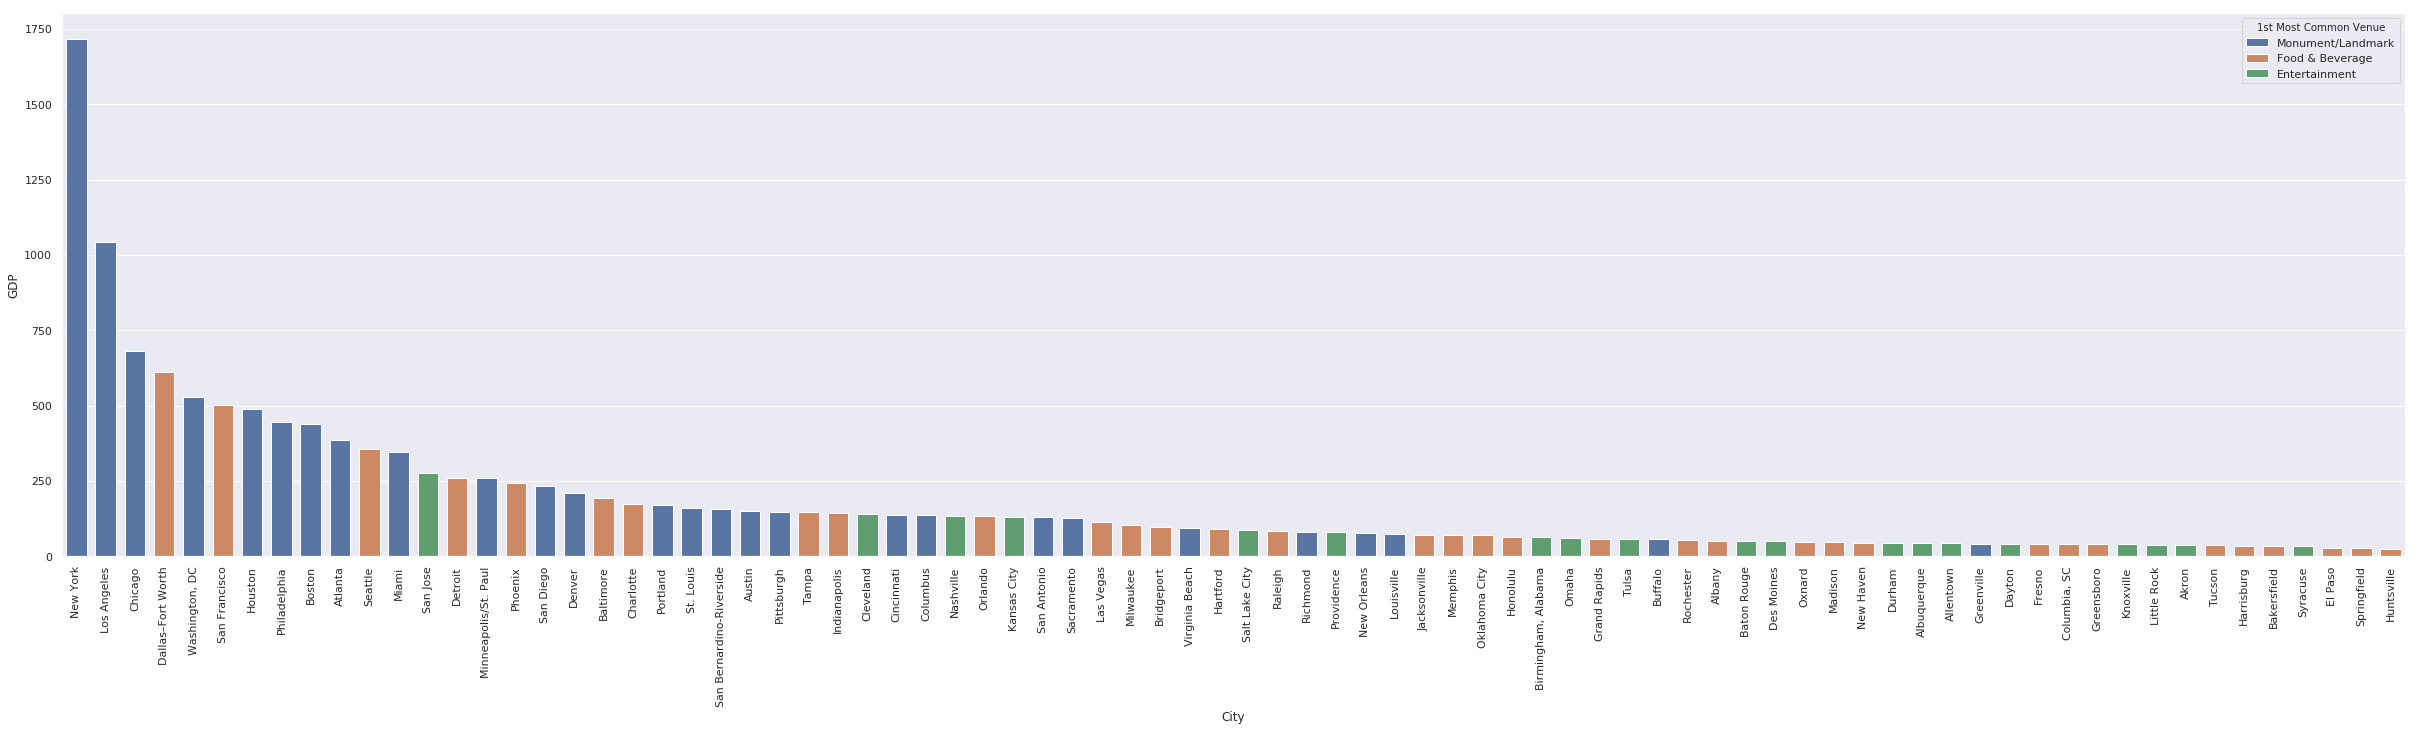

In [74]:
#hist=df4.plot(kind ='bar', figsize=(20, 8), width = 0.8, color='1st Most Common Venue')
import seaborn as sns
fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(42,10)})
plot=sns.barplot(x="City", y="GDP", data=df4, hue='1st Most Common Venue',dodge=False)
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .7)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

### From graph, we can see that "Food & Beverage" spread evenly throughout the GPD span, "Monument/Landmark" seems to be most popular among high GPD cities, "Entertainment" seems to be most popular among lower GPD cities.

# let's see of the same holds true for 2nd popular venures

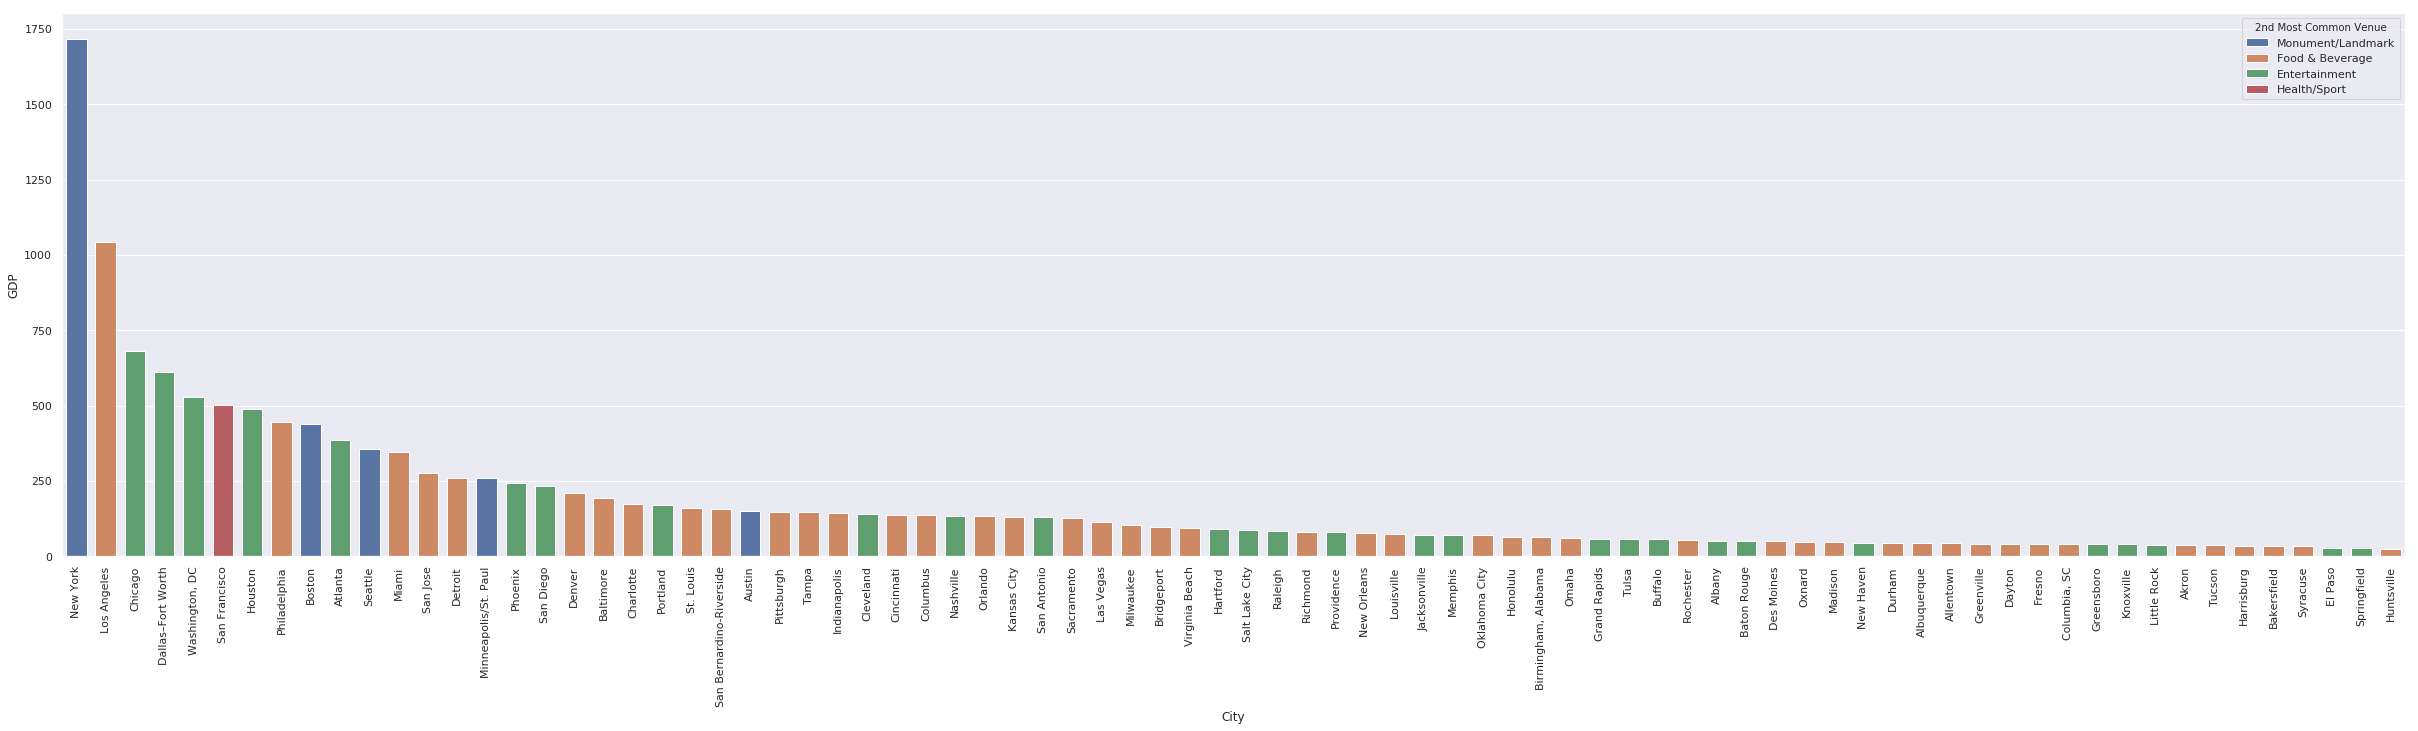

In [76]:
fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(42,10)})
plot=sns.barplot(x="City", y="GDP", data=df4, hue='2nd Most Common Venue',dodge=False)
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .7)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

### while Monument/Landmark definately lost popularity, same rule still hold true. However, Entertainment seems to be distributed evenly amonst cities.